In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np

In [2]:
data = pd.read_csv("../knn/test", names=["gender", "height", "weight"])

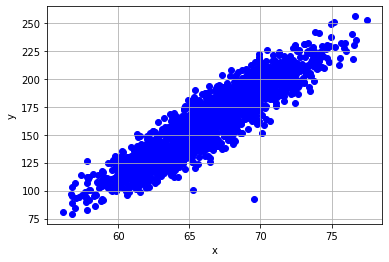

In [3]:
%matplotlib inline 
plt.scatter(data['height'], data['weight'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

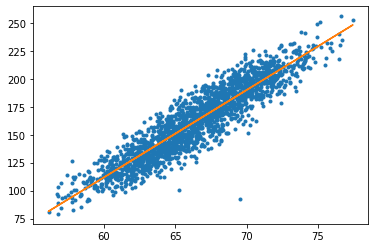

In [4]:
lib_b, lib_m = polyfit(data['height'], data['weight'], 1)
plt.plot(data['height'], data['weight'], '.')
plt.plot(data['height'], lib_b + lib_m * data['height'], '-')
plt.show()

In [5]:
def get_mb(data):
    mean_y = (sum(data['weight'])/len(data['weight']))
    mean_x =  (sum(data['height'])/len(data['height']))
    m = 0
    b = 0
    top = 0
    bottom = 0
    for index, row in data.iterrows():
        current_x = row['height']
        current_y = row['weight']
        top += ((current_x-mean_y)*(current_y-mean_y))
        bottom += (current_x - mean_x) ** 2
    m = top/bottom
    b = mean_y-(m*mean_x)
    return m, b, mean_x, mean_y

In [6]:
small_data = data.head(500)
m, b, mean_x, mean_y = get_mb(small_data)

In [7]:
x = small_data['height']
y = small_data['weight']

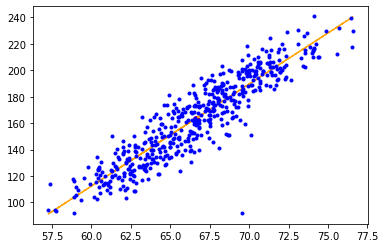

In [8]:
plt.plot(mean_x, mean_y, '.', color='r', marker='o')
plt.plot(x, b + m * x, '--', color='orange')
plt.plot(x, y, '.', color='blue')

In [29]:
error_list = []
for index, row in small_data.iterrows():
    current_x = row['height']
    y = (m*(current_x)+b)
    error_list.append(y)

In [30]:
small_data['predicted'] = error_list

/Users/GaelGil/Desktop/GitRepos/algorithms/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
def get_r2(data, mean_x, mean_y):
    for index, row in data.iterrows():
        current_x = row['height']
        y = (m*(current_x)+b)
        error_list.append(y)
    top_r = 0
    bottom_r = 0 
    for index, row in data.iterrows():
        y_predict = row['predicted']
        y_val = row['weight']
        top_r += (y_predict-mean_x)
        bottom_r += (y_val-mean_y) ** 2
    return top_r/bottom_r

In [32]:
print(get_r2(small_data, mean_x, mean_y))

0.09299618111676904
